In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
visit1 = pd.read_csv('clean_tables/1_separate_visits/df_v1')
visit2 = pd.read_csv('clean_tables/1_separate_visits/df_v2')
visit3 = pd.read_csv('clean_tables/1_separate_visits/df_v3')

In [5]:
visit1

,sex,age_years,years_education,APOE4,apoe_result,family_dementia_history,ptau_result,ttau_result,abeta42_result,AMYL,...,Depression,cdr_global,DX,cdr_sob,LHVL,LHVR,LHV,LWMV,VASCULAR,DXCHANGE
0,f,51,11,0.0,e3/e3,Yes,16.3,331.0,1363.0,0.0,...,False,2.0,Dem,16.5,-1.701,-0.521,-2.221,-0.723,0.0,Stable: Dementia
1,m,76,10,2.0,e4/e4,Yes,22.9,223.0,1700.0,0.0,...,True,0.5,MCI,1.5,0.254,0.025,0.279,0.000,1.0,Reversion: MCI to NC
2,f,61,14,0.0,e3/e3,Yes,19.8,202.0,1406.0,0.0,...,True,1.0,Dem,5.5,-0.642,-0.657,-1.299,0.210,1.0,Stable: Dementia
3,f,53,10,1.0,e2/e4,Yes,22.1,80.0,1150.0,0.0,...,True,NaN,NaN,NaN,-2.135,0.950,-1.185,1.042,1.0,NaN
4,f,77,20,1.0,e3/e4,Yes,NaN,NaN,NaN,NaN,...,True,2.0,Dem,5.5,0.095,-1.189,-1.094,-0.567,0.0,Stable: Dementia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,m,89,12,NaN,NaN,Yes,37.9,268.0,1009.0,0.0,...,True,0.5,MCI,0.5,-0.740,-2.162,-2.901,-1.727,0.0,NaN
996,m,81,13,1.0,e3/e4,Yes,21.7,382.0,1700.0,0.0,...,True,1.0,Dem,11.5,0.338,1.311,1.649,-1.433,0.0,Reversion: Dementia to MCI
997,m,66,20,1.0,e3/e4,Yes,NaN,NaN,NaN,NaN,...,True,0.5,MCI,2.5,1.944,-0.770,1.173,-0.353,0.0,Conversion: MCI to Dementia
998,m,70,16,1.0,e3/e4,Yes,26.3,301.0,755.0,0.0,...,True,1.0,Dem,16.5,0.464,-0.094,0.370,1.524,1.0,Reversion: Dementia to NC


## REMOVE NaN values

In [6]:
# count NaN values
visit1.isnull().sum()

sex                          0
age_years                    0
years_education              0
APOE4                      103
apoe_result                103
family_dementia_history      0
ptau_result                100
ttau_result                100
abeta42_result             100
AMYL                       100
TAUO                       100
NEUROD                     100
ATN                        100
MONTHS                      98
mmse_total                  98
np_date                     98
gds_total                   97
Depression                   0
cdr_global                  95
DX                          95
cdr_sob                     95
LHVL                         0
LHVR                         0
LHV                          0
LWMV                         0
VASCULAR                     0
DXCHANGE                   190
dtype: int64

maybe its the same patients that have ptau, ttau, abeta, AMYL, TAUO, NEUROD, ATN missing! Let's check that!

In [7]:
# drop lines with many NaN values
visit1_some_columns = visit1[["abeta42_result","ptau_result", "ttau_result", "ATN", "AMYL", "NEUROD"]]
indices_na = visit1_some_columns[visit1_some_columns.isna().all(axis=1)].index

In [9]:
len(indices_na)

100

Indeed it's the same patients that have these NaN values. Let's remove them!

In [13]:
# make sure we just remove the indices once
assert visit1.shape[0] == 1000
df_v1 = visit1.drop(indices_na, inplace=False)
df_v2 = visit2.drop(indices_na, inplace=False)
df_v3 = visit3.drop(indices_na, inplace=False)

In [14]:
# store the new patients
# df_v1.to_csv('clean_tables/1_separate_visits/df_v1_no_na', index=False)
# df_v2.to_csv('clean_tables/1_separate_visits/df_v2_no_na', index=False)
# df_v3.to_csv('clean_tables/1_separate_visits/df_v3_no_na', index=False)

## Let's check the new datasets

In [17]:
df_v1 = pd.read_csv('clean_tables/1_separate_visits/df_v1_no_na')
df_v2 = pd.read_csv('clean_tables/1_separate_visits/df_v2_no_na')
df_v3 = pd.read_csv('clean_tables/1_separate_visits/df_v3_no_na')

Let's look at the evolution in time of the data we have from the three visits

In [19]:
common_columns = df_v1.columns.intersection(df_v2.columns).intersection(df_v3.columns)
common_columns

Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'MONTHS', 'mmse_total', 'np_date',
       'gds_total', 'Depression', 'cdr_global', 'DX', 'cdr_sob'],
      dtype='object')

let's look at the ages difference

In [21]:
df_ages = pd.DataFrame({'age_v1': df_v1['age_years'], 'age_v2': df_v2['age_years'], 'age_v3': df_v3['age_years']})

In [23]:
df_ages.head()

,age_v1,age_v2,age_v3
0,51,52,55
1,76,76,80
2,61,62,61
3,53,54,56
4,56,57,60


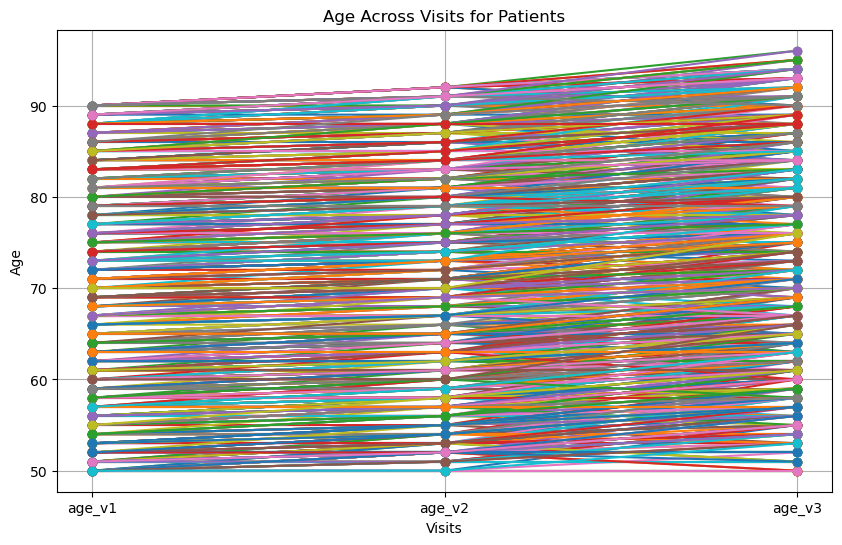

In [31]:
# plot as dots the ages of the patients for visit 1
# plot a graph x: the 3 visits, y: the age, for each patient (scatter plot)
# Plotting
df_ages_transposed = df_ages.transpose()
plt.figure(figsize=(10, 6))

# Plot each patient's age across visits with lines
for patient in df_ages_transposed.columns:
    plt.plot(df_ages_transposed.index, df_ages_transposed[patient], marker='o', label=patient)

plt.xlabel('Visits')
plt.ylabel('Age')
plt.title('Age Across Visits for Patients')
plt.grid(True)

plt.show()

## months

In [33]:
df_months = pd.DataFrame({'months_v1': df_v1['MONTHS'], 'months_v2': df_v2['MONTHS'], 'months_v3': df_v3['MONTHS']})

In [34]:
df_months.head()

,months_v1,months_v2,months_v3
0,0.0,13.0,53.0
1,0.0,4.0,44.0
2,0.0,17.0,NaN
3,0.0,16.0,34.0
4,0.0,14.0,51.0


In [36]:
df_months.describe()

,months_v1,months_v2,months_v3
count,818.0,739.000000,746.000000
mean,0.0,17.424899,52.072386
std,0.0,7.470319,13.145346
min,0.0,0.000000,25.000000
25%,0.0,12.000000,41.000000
50%,0.0,17.000000,52.000000
75%,0.0,24.000000,63.000000
max,0.0,35.000000,79.000000


Between the visits the average time was 17 months and 52 months

In [42]:
print(f"second visit was on average {df_months['months_v2'].mean()} months after the first visit")
print(f"third visit was on average {df_months['months_v3'].mean()} months after the second visit")

second visit was on average 17.42489851150203 months after the first visit
third visit was on average 52.07238605898123 months after the second visit


## DX evolution

In [43]:
# dx during visit
df_dx = pd.DataFrame({'dx_v1': df_v1['DX'], 'dx_v2': df_v2['DX'], 'dx_v3': df_v3['DX'], 'dx_change': df_v1['DXCHANGE']})

In [44]:
df_dx

,dx_v1,dx_v2,dx_v3,dx_change
0,Dem,Dem,Dem,Stable: Dementia
1,MCI,Dem,NC,Reversion: MCI to NC
2,Dem,NC,Dem,Stable: Dementia
3,NaN,NaN,Dem,NaN
4,Dem,NC,Dem,Stable: Dementia
...,...,...,...,...
895,NC,MCI,Dem,Conversion: NC to Dementia
896,MCI,Dem,NaN,NaN
897,Dem,MCI,MCI,Reversion: Dementia to MCI
898,Dem,Dem,NC,Reversion: Dementia to NC


In [45]:
df_dx['dx_change'].value_counts()

dx_change
Stable: Dementia               258
Conversion: MCI to Dementia    107
Reversion: Dementia to MCI      96
Reversion: Dementia to NC       83
Conversion: NC to Dementia      76
Stable: MCI                     32
Reversion: MCI to NC            29
Stable: NC                      27
Conversion: NC to MCI           20
Name: count, dtype: int64

# tem alzheimer

In [58]:
# ela considera AD como A+T+N+ e Dem
df_alzheimer = pd.DataFrame({'df_dx': df_v3['DX'], 'df_ATN': df_v1['ATN']})

In [55]:
df_alzheimer.head()

,df_dx,df_ATN,alzheimer
0,Dem,A-T-N+,0
1,MCI,A-T-N-,0
2,Dem,A-T-N-,0
3,NaN,A-T-N-,0
4,Dem,A-T-N-,0


In [59]:
df_alzheimer['df_ATN'].value_counts()

df_ATN
A-T-N-    562
A-T-N+    240
A+T-N-     61
A-T+N-     25
A-T+N+     10
A+T+N+      1
A+T+N-      1
Name: count, dtype: int64

In [48]:
df_alzheimer["alzheimer"] = df_alzheimer["df_dx"].apply(lambda x: 1 if x == "Dem" else 0) & df_alzheimer["df_ATN"].apply(lambda x: 1 if x == "A+T+N+" else 0)

In [54]:
df_alzheimer['alzheimer'].value_counts()

alzheimer
0    900
Name: count, dtype: int64

In [65]:
df_v1.columns

Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'AMYL', 'TAUO', 'NEUROD', 'ATN', 'MONTHS',
       'mmse_total', 'np_date', 'gds_total', 'Depression', 'cdr_global', 'DX',
       'cdr_sob', 'LHVL', 'LHVR', 'LHV', 'LWMV', 'VASCULAR', 'DXCHANGE'],
      dtype='object')

In [ ]:
# dictionary converting the values of DXCHANGE to the corresponding bool
dxchange_dict = {"Conversion: MCI to Dementia": 1,"Reversion: Dementia to MCI": 0,
"Reversion: Dementia to NC ": 0, "Conversion: NC to Dementia ": 1, "Stable: MCI"
"Reversion: MCI to NC"            29
"Stable: NC"                      27
"Conversion: NC to MCI"           20

In [ ]:
df_v1['conversion'] = df_v1['DXCHANGE']

In [71]:
df_v3.isnull().sum()

sex                          0
age_years                    0
years_education              0
APOE4                       94
apoe_result                 94
family_dementia_history      0
MONTHS                     154
mmse_total                  85
np_date                     85
gds_total                   72
Depression                   0
cdr_global                  94
DX                          94
cdr_sob                     94
dtype: int64

In [72]:
df_v1.columns

Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'AMYL', 'TAUO', 'NEUROD', 'ATN', 'MONTHS',
       'mmse_total', 'np_date', 'gds_total', 'Depression', 'cdr_global', 'DX',
       'cdr_sob', 'LHVL', 'LHVR', 'LHV', 'LWMV', 'VASCULAR', 'DXCHANGE'],
      dtype='object')

- columns to use:
- - age
- - gds total em vez de depression
- - APOE4 em vez de apoe_result
- - abeta42, ptau, ttau em vez de AMYL, TAUO, neurod
- - LWMV em vez de VASCULAR
- - 
- columns not to use:

In [76]:
df_v1[['LHVL', 'LHVR', 'LHV', 'LWMV']]

,LHVL,LHVR,LHV,LWMV
0,-1.701,-0.521,-2.221,-0.723
1,0.254,0.025,0.279,0.000
2,-0.642,-0.657,-1.299,0.210
3,-2.135,0.950,-1.185,1.042
4,-0.909,-0.139,-1.048,-0.827
...,...,...,...,...
895,0.416,-1.619,-1.203,-1.037
896,-0.740,-2.162,-2.901,-1.727
897,0.338,1.311,1.649,-1.433
898,0.464,-0.094,0.370,1.524


In [83]:
df_v1.columns

Index(['sex', 'age_years', 'years_education', 'APOE4', 'apoe_result',
       'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'AMYL', 'TAUO', 'NEUROD', 'ATN', 'MONTHS',
       'mmse_total', 'np_date', 'gds_total', 'Depression', 'cdr_global', 'DX',
       'cdr_sob', 'LHVL', 'LHVR', 'LHV', 'LWMV', 'VASCULAR', 'DXCHANGE'],
      dtype='object')

In [ ]:
df_v1[['gds_total', 'Depression']]

,gds_total,Depression
0,9.0,False
1,14.0,True
2,NaN,True
3,14.0,True
4,14.0,True
...,...,...
895,16.0,True
896,12.0,True
897,22.0,True
898,20.0,True


In [78]:
df_continuous_dx = df_v1[['sex', 'age_years', 'years_education', 'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result', 'abeta42_result','mmse_total','gds_total','cdr_sob','LHVL', 'LHVR', 'LHV', 'LWMV','DX']]

In [ ]:
df_continuous_AMYL = df_v1[['sex', 'age_years', 'years_education', 'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result','mmse_total','gds_total','DX','cdr_sob','LHVL', 'LHVR', 'LHV', 'LWMV', 'AMYL']]

In [79]:
df_categorical_dx = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression','cdr_sob', 'LHVL', 'LHVR', 'LHV', 'VASCULAR','DX']]

In [ ]:
df_categorical_AMYL = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression','cdr_sob', 'DX', 'LHVL', 'LHVR', 'LHV', 'VASCULAR','AMYL']]

In [81]:
continuous_data.isnull().sum()  

sex                         0
age_years                   0
years_education             0
APOE4                      94
family_dementia_history     0
ptau_result                 0
ttau_result                 0
abeta42_result              0
mmse_total                 82
gds_total                  87
cdr_sob                    87
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
DX                         87
dtype: int64

In [84]:
df_v1[['APOE4', 'apoe_result']]

,APOE4,apoe_result
0,0.0,e3/e3
1,2.0,e4/e4
2,0.0,e3/e3
3,1.0,e2/e4
4,2.0,e4/e4
...,...,...
895,NaN,NaN
896,NaN,NaN
897,1.0,e3/e4
898,1.0,e3/e4


In [87]:
df_dx = pd.DataFrame({'dx_v1': df_v1['DX'], 'dx_v2': df_v2['DX'], 'dx_v3': df_v3['DX'], 'dx_change': df_v1['DXCHANGE']})

In [89]:
df_dx.head(20)

,dx_v1,dx_v2,dx_v3,dx_change
0,Dem,Dem,Dem,Stable: Dementia
1,MCI,Dem,NC,Reversion: MCI to NC
2,Dem,NC,Dem,Stable: Dementia
3,NaN,NaN,Dem,NaN
4,Dem,NC,Dem,Stable: Dementia
5,MCI,MCI,Dem,Conversion: MCI to Dementia
6,NaN,Dem,NC,NaN
7,MCI,MCI,Dem,Conversion: MCI to Dementia
8,Dem,MCI,MCI,Reversion: Dementia to MCI
9,NaN,NC,Dem,NaN


In [90]:
df_dx['change'] = ((df_dx['dx_v1'] == "NC") | (df_dx['dx_v1'] == "MCI")) & (df_dx['dx_v3'] == "Dem") 

In [106]:
# create a column of NaN values
df_dx['mydxchange'] = np.nan

In [109]:
right_indices = []
for i in indices_na:
    df_dx.iloc[i]
    if df_dx.iloc[i]['dx_v1'] is np.nan:
        if (df_dx.iloc[i]['dx_v3'] == "Dem") & (df_dx.iloc[i]['dx_v2'] == "MCI"):
            df_dx.iloc[i]['mydxchange'] = True
            print(i," caso 1")
            right_indices.append(i)
    elif df_dx.iloc[i]['dx_v3'] is np.nan:
        if (df_dx.iloc[i]['dx_v1'] == "MCI") & (df_dx.iloc[i]['dx_v2'] == "Dem"):
            df_dx.iloc[i]['mydxchange'] = True
            print(i," caso 2")
            right_indices.append(i)
right_indices

50  caso 1
62  caso 1
65  caso 1
130  caso 1
202  caso 2
320  caso 1
391  caso 1
409  caso 1
418  caso 1
432  caso 1
547  caso 2
571  caso 1
638  caso 2
690  caso 2
696  caso 1
705  caso 2
724  caso 2
766  caso 1
890  caso 2
896  caso 2


C:\Users\anaso\AppData\Local\Temp\ipykernel_27736\100389971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dx.iloc[i]['mydxchange'] = True
C:\Users\anaso\AppData\Local\Temp\ipykernel_27736\100389971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dx.iloc[i]['mydxchange'] = True


[50,
 62,
 65,
 130,
 202,
 320,
 391,
 409,
 418,
 432,
 547,
 571,
 638,
 690,
 696,
 705,
 724,
 766,
 890,
 896]

In [110]:
# True if indix is in indices_right
df_dx['mydxchange'] = df_dx.index.isin(right_indices)

In [112]:
df_dx['mydxchange']

0      False
1      False
2      False
3      False
4      False
       ...  
895    False
896     True
897    False
898    False
899    False
Name: mydxchange, Length: 900, dtype: bool

In [115]:
df_dx['mydxchange'] = df_dx['mydxchange'].astype(bool)

In [118]:
df_dx['dx_change_final'] = df_dx['change'] | df_dx['mydxchange']

In [120]:
df_dx['dx_change_final'].value_counts()

dx_change_final
False    697
True     203
Name: count, dtype: int64

In [102]:
df_dx.iloc[3]['dx_v1'] is np.nan

True

In [108]:
# only indices where dx_change is NaN
indices_na = df_dx[df_dx['dx_change'].isna()].index
df_dx.iloc[indices_na]

,dx_v1,dx_v2,dx_v3,dx_change,change,mydxchange
3,NaN,NaN,Dem,NaN,False,NaN
6,NaN,Dem,NC,NaN,False,NaN
9,NaN,NC,Dem,NaN,False,NaN
19,NaN,NC,NC,NaN,False,NaN
30,NaN,Dem,Dem,NaN,False,NaN
...,...,...,...,...,...,...
866,Dem,Dem,NaN,NaN,False,NaN
883,NaN,Dem,Dem,NaN,False,NaN
888,Dem,Dem,NaN,NaN,False,NaN
890,MCI,Dem,NaN,NaN,False,NaN


In [124]:
(df_dx['dx_v1'].isna() & df_dx['dx_v2'].isna() & df_dx['dx_v3'].isna()).value_counts()

False    888
True      12
Name: count, dtype: int64

In [128]:
# indices where dx_v1 and dx_v2 are NaN or dx_v2 and dx_v3 are NaN or dx_v1 and dx_v3 are NaN
df_dx['at_least_two_nans'] = ((df_dx['dx_v1'].isna() & df_dx['dx_v2'].isna()) | (df_dx['dx_v2'].isna() & df_dx['dx_v3'].isna()) | (df_dx['dx_v1'].isna() & df_dx['dx_v3'].isna()))

In [130]:
# indexes where at least two of the dx are NaN
indices_at_least_two_nans = df_dx[df_dx['at_least_two_nans']].index

In [131]:
indices_at_least_two_nans

Index([  3,  40,  76,  99, 101, 126, 179, 190, 194, 227, 240, 254, 255, 265,
       269, 364, 375, 439, 484, 496, 508, 524, 615, 707, 715, 742, 782, 834],
      dtype='int64')

In [132]:
# store df_dx
# df_dx.to_csv('clean_tables/1_separate_visits_/df_dx', index=False)

In [134]:
df_dx

,dx_v1,dx_v2,dx_v3,dx_change,change,mydxchange,dx_change_final,at_least_two_nans
0,Dem,Dem,Dem,Stable: Dementia,False,False,False,False
1,MCI,Dem,NC,Reversion: MCI to NC,False,False,False,False
2,Dem,NC,Dem,Stable: Dementia,False,False,False,False
3,NaN,NaN,Dem,NaN,False,False,False,True
4,Dem,NC,Dem,Stable: Dementia,False,False,False,False
...,...,...,...,...,...,...,...,...
895,NC,MCI,Dem,Conversion: NC to Dementia,True,False,True,False
896,MCI,Dem,NaN,NaN,False,True,True,False
897,Dem,MCI,MCI,Reversion: Dementia to MCI,False,False,False,False
898,Dem,Dem,NC,Reversion: Dementia to NC,False,False,False,False
